<a href="https://colab.research.google.com/github/kelvinnjunge/world-cup-prediction/blob/main/worldcup_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the question


## a) Specifying the question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided


## b) Defining the metrics for success


The objective for this data includes investigating whether or ot the game is friendly while making the predictions



## c) Understanding the context

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. ---- Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).




## d) Recording the Experimental Design




1.  reading in the datasets
2. checking the data for duplicates and missinng data 
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of EDA recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
7. Perform any necessary feature engineering
8. Check of multicollinearity
9. Start building the model, Cross-validate the model
10. Compute RMSE
11. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
12. Perform appropriate regressions on the data including your justification
13. Challenge your solution by providing insights on how you can make improvements
  






# Checking the data


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Loading the fifa dataset
fifa = pd.read_csv('/content/fifa_ranking.csv',parse_dates=[-1])

In [3]:
# Previewing the data set
fifa.head(1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [4]:
# Looking for the shape of fifa data set
fifa.shape

(57793, 16)

In [5]:
# Checking for columns of data sets
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [6]:
# Dropping unnecessary columns
fifa.drop(columns=['cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],inplace= True)

In [8]:
# Dropping more columns
fifa.drop(columns=["country_abrv","total_points","previous_points","rank_change","cur_year_avg"],inplace=True)

In [9]:
#previewing the data set after dropping  unnecessary columns
fifa.head(1)

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08


In [10]:
# checking for info of the dataset
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rank           57793 non-null  int64         
 1   country_full   57793 non-null  object        
 2   confederation  57793 non-null  object        
 3   rank_date      57793 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
# creating year column in the data set
fifa['year'] = fifa['rank_date'].dt.year

In [12]:
# Preview the data set
fifa.head(1)

,rank,country_full,confederation,rank_date,year
0,1,Germany,UEFA,1993-08-08,1993


In [14]:
# Loading the results dataset
results = pd.read_csv('/content/results.csv',parse_dates=[0])
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False


In [15]:
# Checking the shape of results datasets
results.shape

(40839, 9)

In [16]:
# checking the info of the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [17]:
# Creating the year columns
results['year'] = results['date'].dt.year

In [20]:
#  checking the unique years
results['year'].unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [21]:
# checking unique years in the dataset
fifa['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [22]:
# Filtering out the data for 4 years because uses 4 years data for ranking
results = results[results['year'] >= 2014]
results= results[results['year'] < 2019]

In [23]:
# checking number of years in the dataset
results['year'].unique()

array([2014, 2015, 2016, 2017, 2018])

In [24]:
# Filtering out the data for 4 years because uses 4 years data for ranking
fifa = fifa[fifa['year'] >= 2014]

In [25]:
# checking number of years in the dataset
fifa['year'].unique()

array([2014, 2015, 2016, 2017, 2018])

In [26]:
# merging the two datasets on year
final = results.merge(fifa,left_on=['home_team','year'],right_on=['country_full','year'],how= "inner")
final.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,confederation,rank_date
0,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,Doha,Qatar,True,2014,106,Kuwait,AFC,2014-01-16


In [27]:
# merging the two data sets
final = final.merge(fifa,left_on=['away_team','year'],right_on=['country_full','year'],how= "inner")
final.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,confederation_x,rank_date_x,rank_y,country_full_y,confederation_y,rank_date_y
0,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,Doha,Qatar,True,2014,106,Kuwait,AFC,2014-01-16,72,Jordan,AFC,2014-01-16


In [28]:
# dropping unnecessary columns
final = final.drop(columns=['city','country',"neutral",'year','country_full_x','country_full_y'])

In [29]:
# previewing the datasets
final.head(1)

,date,home_team,away_team,home_score,away_score,tournament,rank_x,confederation_x,rank_date_x,rank_y,confederation_y,rank_date_y
0,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,106,AFC,2014-01-16,72,AFC,2014-01-16


In [30]:
# dropping rank date x and rank date y
final = final.drop("rank_date_x",axis =1)
final = final.drop("rank_date_y",axis =1)

In [31]:
# checking for duplicates in the datasets
final.duplicated(subset=['date','home_team','away_team','home_score','away_score','tournament']).sum()

440898

In [32]:
# dropping the datasets
final.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)

In [33]:
# checking for missing values in the data
final.isnull().sum()

date               0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
rank_x             0
confederation_x    0
rank_y             0
confederation_y    0
dtype: int64

In [35]:
# checking for tournaments details
final['tournament'].unique()

array(['WAFF Championship', 'AFC Asian Cup qualification', 'Friendly',
       'AFC Challenge Cup', 'Gulf Cup', 'African Nations Championship',
       'African Cup of Nations qualification', 'FIFA World Cup',
       'UEFA Euro qualification', 'AFF Championship', 'Baltic Cup',
       'UNCAF Cup', 'EAFF Championship',
       'CFU Caribbean Cup qualification', 'CFU Caribbean Cup',
       'Windward Islands Tournament', 'AFC Asian Cup',
       'FIFA World Cup qualification', 'Copa América',
       'African Cup of Nations', 'COSAFA Cup', 'CECAFA Cup', 'Gold Cup',
       'SAFF Cup', 'ABCS Tournament', 'Oceania Nations Cup qualification',
       'UEFA Euro', 'Kirin Cup', 'Copa América qualification',
       "King's Cup", 'Oceania Nations Cup', 'Confederations Cup',
       'UEFA Nations League', 'Intercontinental Cup'], dtype=object)

In [36]:
# filtering tournament column and creating new column 
def y(match) :
  if match == 'FIFA World Cup':
    return 1
  elif match == 'FIFA World Cup qualification':
    return 2
  else:
    return 3

final['competition']= final['tournament'].apply(lambda x:y(x))
final['competition'].unique()

array([3, 1, 2])

In [37]:
# Checking info of the dataset
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3606 entries, 0 to 444468
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             3606 non-null   datetime64[ns]
 1   home_team        3606 non-null   object        
 2   away_team        3606 non-null   object        
 3   home_score       3606 non-null   int64         
 4   away_score       3606 non-null   int64         
 5   tournament       3606 non-null   object        
 6   rank_x           3606 non-null   int64         
 7   confederation_x  3606 non-null   object        
 8   rank_y           3606 non-null   int64         
 9   confederation_y  3606 non-null   object        
 10  competition      3606 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 338.1+ KB


In [38]:
 # Renaming the rank x and rank y columns
 final.rename(columns={'rank_x':'home_team_rank', 'rank_y':'away_team_rank'},inplace=True)

In [39]:
# dropping unnecessary columns
final.drop(columns=["confederation_y","confederation_x"],inplace=True)

In [40]:
# previewing the dataset
final.head(1)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition
0,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,106,72,3


In [41]:
# creating new column
def outcome(cols):
  home_score = cols[0]
  away_score = cols[1]
  if home_score > away_score:
        return 'Win'
  elif home_score < away_score:
        return 'Loss'
  else:
        return 'Draw'
      
final['status'] = final[['home_score','away_score']].apply(outcome,axis=1)

In [42]:
# previewing the dataset
final.head(1)

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition,status
0,2014-01-01,Kuwait,Jordan,1,2,WAFF Championship,106,72,3,Loss


## EXPLORATORY DATA ANALYSIS


In [43]:
# Frequency table for the home team
final['home_team'].value_counts()

France            48
Mexico            45
Japan             43
Germany           42
Qatar             41
                  ..
Cook Islands       1
Montserrat         1
Samoa              1
Eritrea            1
American Samoa     1
Name: home_team, Length: 192, dtype: int64

In [44]:
# Frequency table for the away team
final["away_team"].value_counts()

Iceland           40
Uganda            37
Costa Rica        35
Jordan            35
Syria             33
                  ..
Montserrat         1
Bahamas            1
Vanuatu            1
Eritrea            1
Cayman Islands     1
Name: away_team, Length: 194, dtype: int64

In [45]:
# Frequency table for the tournament
final.tournament.value_counts()

Friendly                                1383
FIFA World Cup qualification             677
African Cup of Nations qualification     269
UEFA Euro qualification                  248
African Nations Championship             153
UEFA Nations League                      132
FIFA World Cup                           109
AFC Asian Cup qualification               77
COSAFA Cup                                74
AFF Championship                          56
Copa América                              52
UEFA Euro                                 51
African Cup of Nations                    45
CECAFA Cup                                37
Gold Cup                                  34
CFU Caribbean Cup qualification           26
SAFF Cup                                  24
AFC Challenge Cup                         19
AFC Asian Cup                             19
Confederations Cup                        16
EAFF Championship                         16
Oceania Nations Cup                       15
Gulf Cup  

In [46]:
# Frequency table for the  status
final["status"].value_counts()

Win     1693
Loss    1005
Draw     908
Name: status, dtype: int64

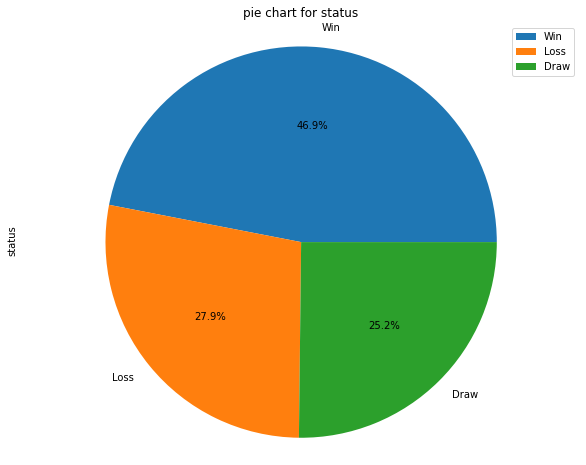

In [47]:
 # plotting for the pie chart for status
 pie = final.status.value_counts().plot(kind="pie",autopct= "%1.1f%%")
 fig = plt.gcf()
 fig.set_size_inches(10,8)
 plt.axis('equal')
 plt.title('pie chart for status')
 plt.legend()
 plt.show()

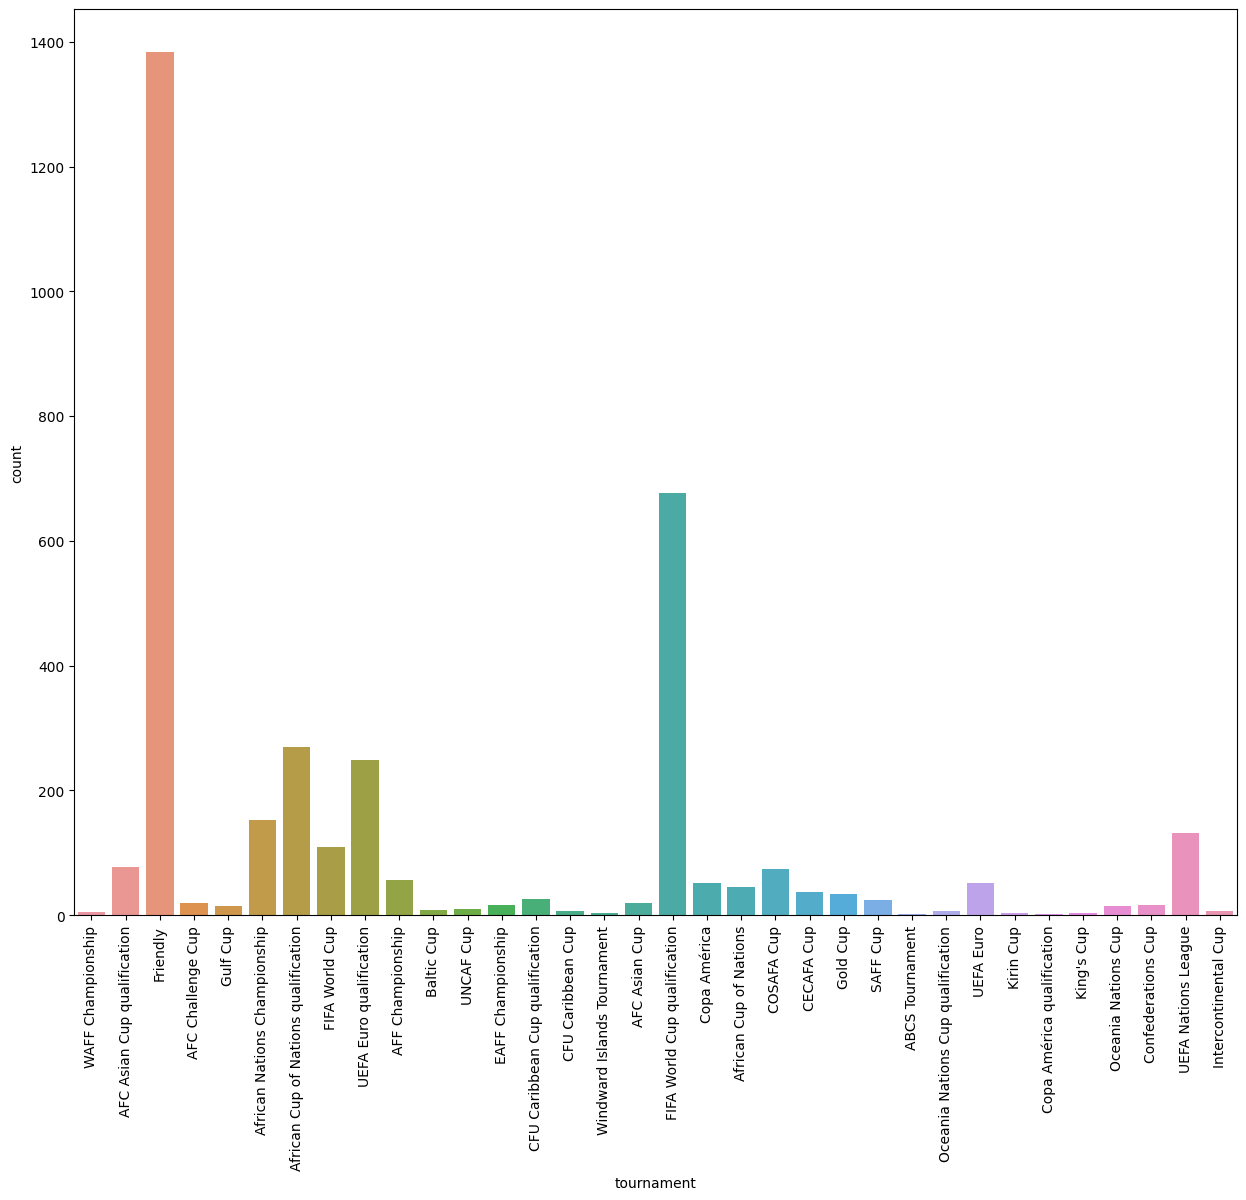

In [48]:
# plotting bar graph for the tournament
plt.figure(figsize=(15,12),dpi = 100)
sns.countplot(x="tournament",data=final)
plt.xticks(rotation=90)
plt.show()

## Numerical variables

In [49]:
# checking for  summary statistics for numerical columns
final.describe().T

,count,mean,std,min,25%,50%,75%,max
home_score,3606.0,1.513588,1.485653,0.0,0.0,1.0,2.0,15.0
away_score,3606.0,1.038824,1.207072,0.0,0.0,1.0,2.0,8.0
home_team_rank,3606.0,81.467277,55.827055,1.0,33.0,74.0,122.0,209.0
away_team_rank,3606.0,84.767055,55.820319,1.0,37.0,77.0,126.0,209.0
competition,3606.0,2.751803,0.497110,1.0,3.0,3.0,3.0,3.0


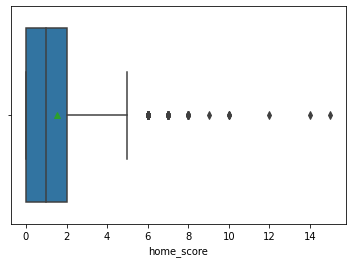

In [50]:
# Plotting bar graph for home score
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(final.home_score,showmeans=True);

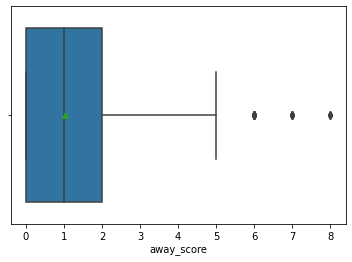

In [51]:
# Plotting bar graph for away score
sns.boxplot(final.away_score,showmeans=True)
plt.show()

<Figure size 1000x800 with 0 Axes>

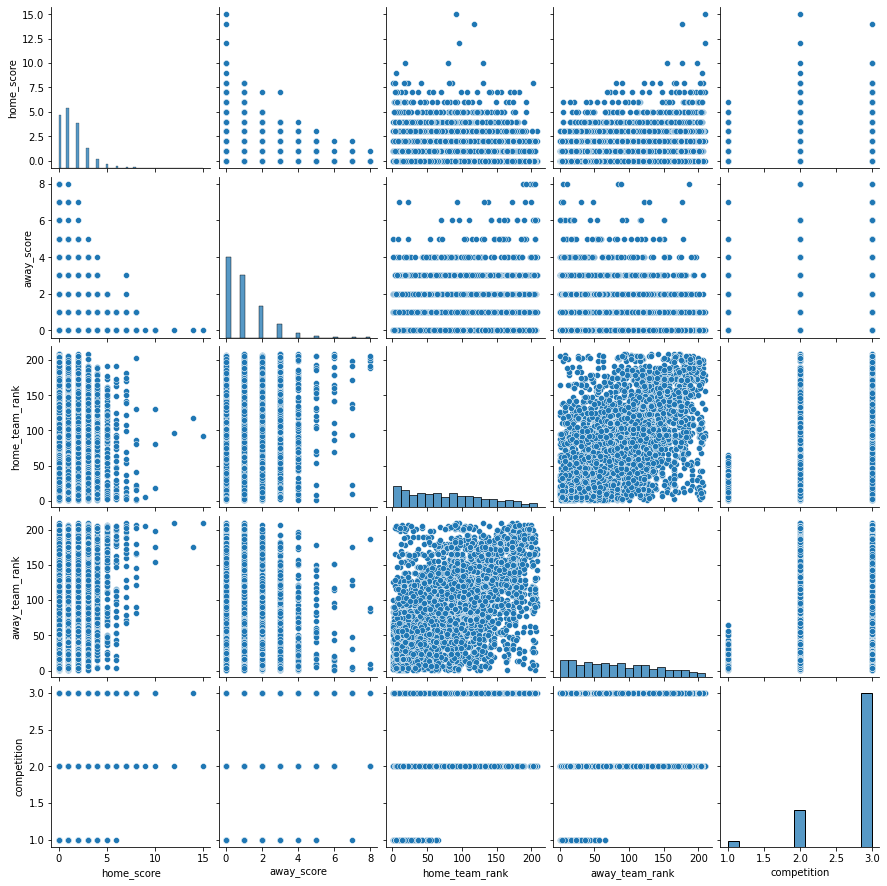

In [52]:
# Plotting  pairplot
plt.figure(figsize=(10,8),dpi=100)
sns.pairplot(final[['home_score','away_score', 'home_team_rank', 'away_team_rank', 'competition']])
plt.show()

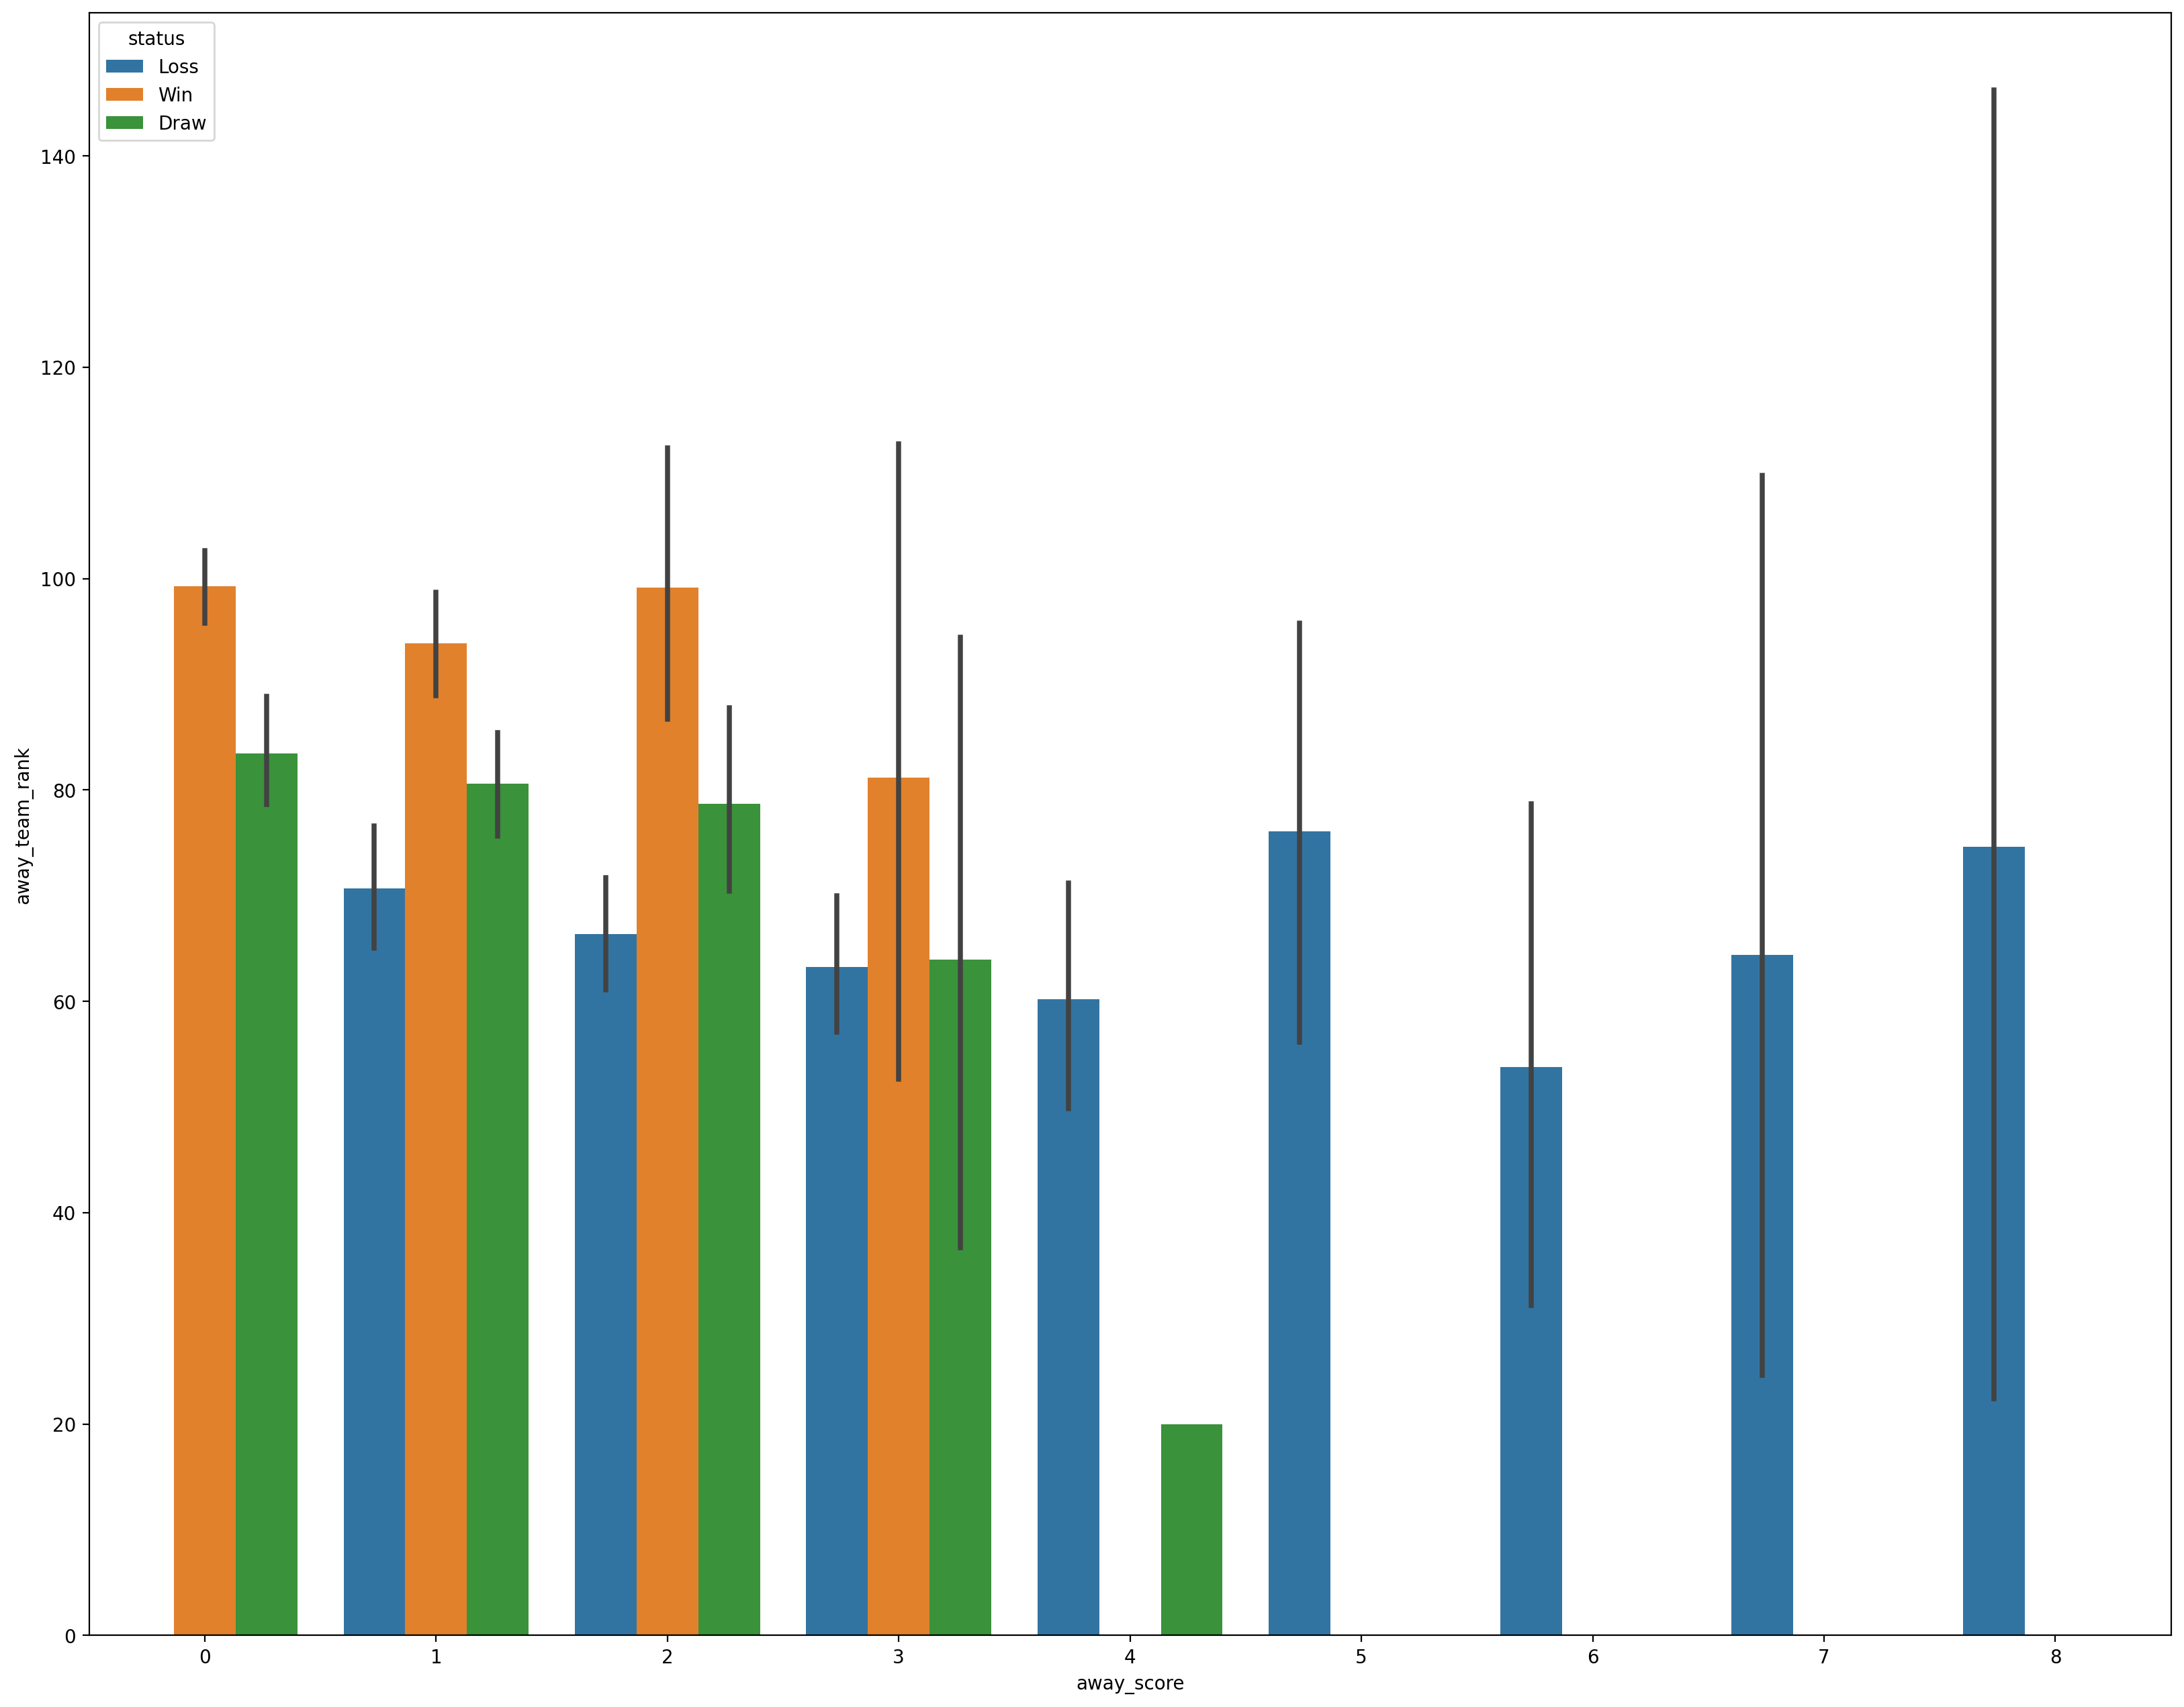

In [53]:
# plotting bar graph for  away score and away team
plt.figure(figsize=(20,16),dpi=200)
sns.barplot(x=final.away_score,y=final.away_team_rank,hue=final.status)
plt.show()

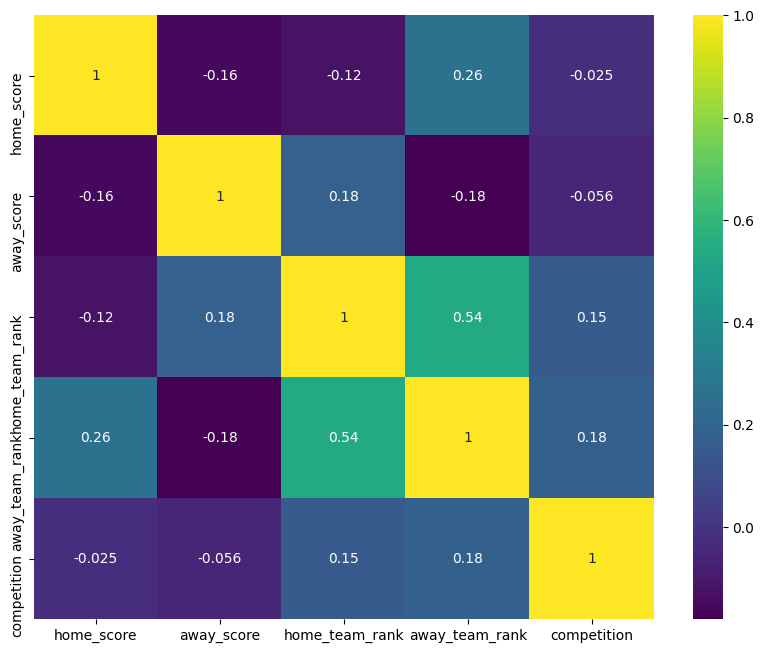

In [54]:
# plotting heat map to show correlation of varibles
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(final.corr(),annot=True,cmap="viridis")
plt.show()

## Checking for multi-collinearity


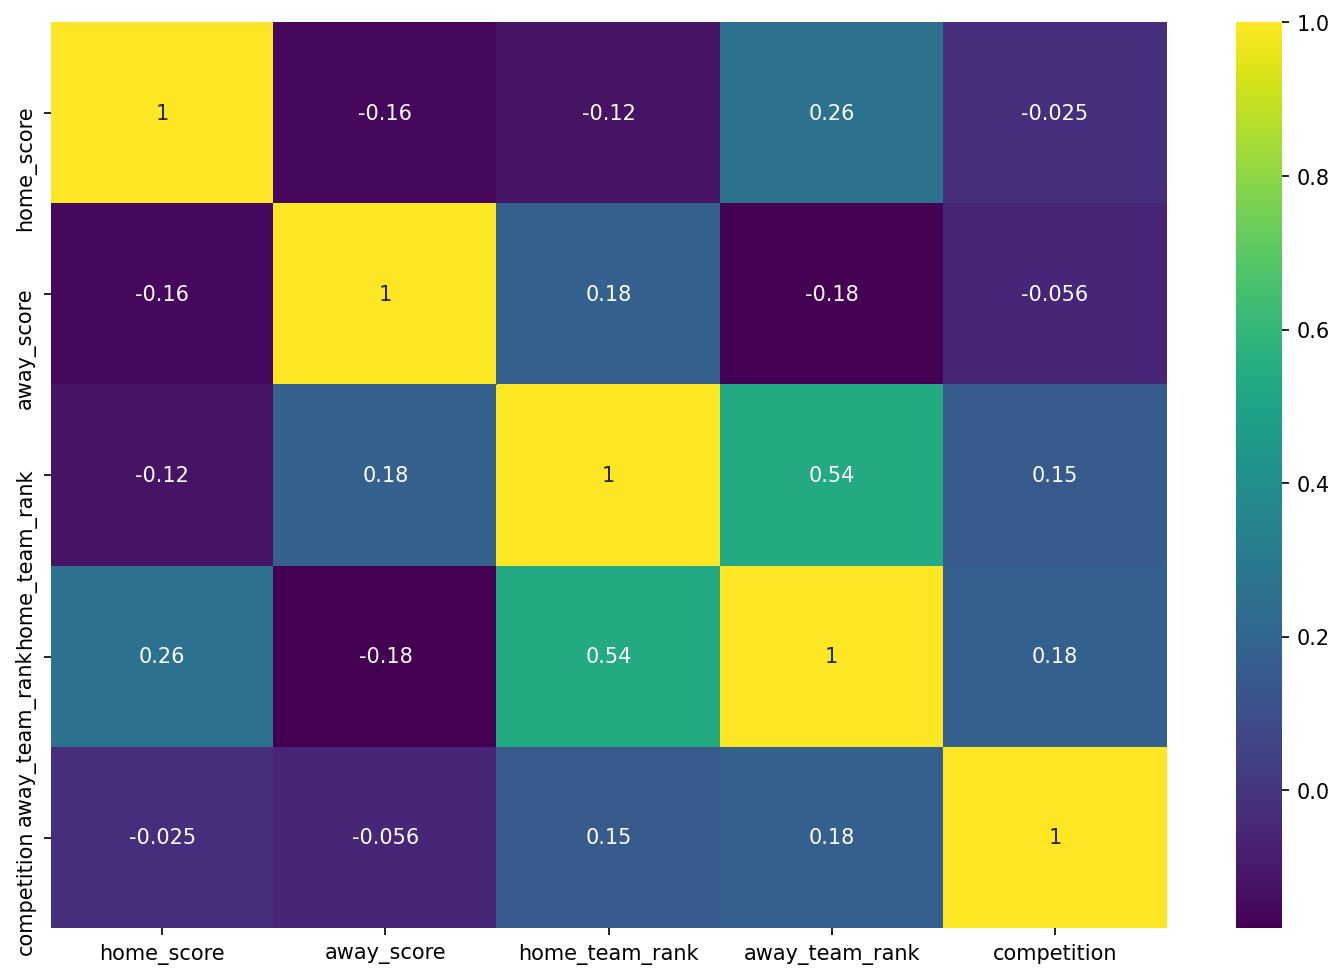

In [55]:
# plotting heatmap
corr = final.corr()
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(corr,annot=True,cmap= 'viridis')
plt.show()

In [56]:
# checking for multicollinearity
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)
vif
#sns.heatmap(vif,cmap="viridis",annot=True)

,home_score,away_score,home_team_rank,away_team_rank,competition
home_score,1.199551,0.013151,0.433627,-0.551841,0.061747
away_score,0.013151,1.166435,-0.454642,0.441661,0.056704
home_team_rank,0.433627,-0.454642,1.753812,-1.124062,-0.084128
away_team_rank,-0.551841,0.441661,-1.124062,1.853232,-0.144505
competition,0.061747,0.056704,-0.084128,-0.144505,1.043057


 The was no variable with high multi-collinearity


### Approach 1 : Polynomial Regression


In [57]:
# dropping tournament column
final = final.drop('tournament',axis=1)
final.head(1)

,date,home_team,away_team,home_score,away_score,home_team_rank,away_team_rank,competition,status
0,2014-01-01,Kuwait,Jordan,1,2,106,72,3,Loss


In [59]:
# Dropping home_team and away team
final = final.drop(columns=['home_team','away_team'])
final.head(1)
final.head(1)

,date,home_score,away_score,home_team_rank,away_team_rank,competition,status
0,2014-01-01,1,2,106,72,3,Loss


In [60]:
#  converting all categorical columns to numerical
final1 = pd.get_dummies(final,drop_first=True)

In [76]:
# Dropping date column
final1 = final1.drop('date',axis=1)

In [77]:
# separating our label from features
X = final1.drop('home_score',axis=1)
y = final1['home_score']

In [82]:
# importing polynomial 
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [83]:
# Importing train text split
from sklearn.model_selection import train_test_split

In [84]:
# spliting train and text
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [90]:
# importing linear regression
from sklearn.linear_model import LinearRegression

In [91]:
# creating linear regression
model = LinearRegression(fit_intercept=True)

In [93]:
# fitting linear regression on our X_train and y_train
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
# Predicting the  y values
test_predictions = model.predict(X_test)

In [95]:
# Importing the metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [96]:
# calculating the mean absolute error and root mean squared error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [97]:
# mean absolute error
MAE

0.5850013088970262

In [98]:
# root mean squared squared error
RMSE

0.8966985520786659

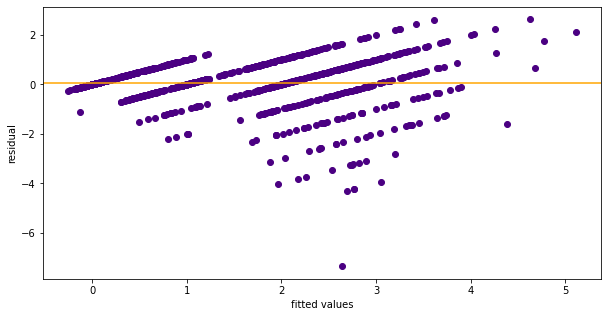

In [100]:
# plotting the residual graph
residuals = test_predictions - y_test

# Plotting the prediction errors
plt.figure(figsize=(10,5))
plt.scatter(test_predictions, residuals, color='indigo')
#plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange')
plt.show()

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice. Our data is normal since its random

In [102]:
#Bartlett's test
import scipy as sp
test_result, p_value = sp.stats.bartlett(test_predictions,residuals)
degree_of_freedom = len(test_predictions)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

1437.5643443151755
the variances are homogeneous!


### MODEL 2 POLYNOMIAL  FOR AWAY SCORE

In [105]:
# Dropping date column
final = final.drop('date',axis=1)
final.head(1)

,home_score,away_score,home_team_rank,away_team_rank,competition,status
0,1,2,106,72,3,Loss


In [106]:
# converting category variable to numerical
final2 = pd.get_dummies(final,drop_first=True)

In [121]:
# creating features and label
X1 = final2.drop('away_score',axis=1)
y2 = final2['away_score']

In [122]:
# Creating polynomial features
from sklearn.preprocessing import PolynomialFeatures
polynomial_c = PolynomialFeatures(degree=2,include_bias=False)
poly_feature = polynomial_c.fit_transform(X1)

In [124]:
# train testing our dataset
X1_train, X1_test, y2_train, y2_test = train_test_split(poly_feature, y2, test_size=0.3, random_state=101)

In [114]:
# Creating a model
model1 = LinearRegression(fit_intercept=True)

In [125]:
# Fitting linear regression on our model
model1.fit(X1_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Predicting the z values
test_pred = model.predict(X1_test)

In [128]:
# Calculating the metrics of our model
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [129]:
# Mean absolute error of our model
MAE

1.500531887502469

In [130]:
# Root mean squared error of our model
RMSE

1.8529811065760387

### LOGISTIC REGRESSION

In [132]:
# previewing the dataset
final.head(1)

,home_score,away_score,home_team_rank,away_team_rank,competition,status
0,1,2,106,72,3,Loss


In [133]:
# separating label from features
W = final.drop('status',axis=1)
z = final['status']

In [135]:
# separating train and test 
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.25, random_state=101)

In [136]:
# scaling and fitting  our dataset
scaler = StandardScaler()
scaled_W_train = scaler.fit_transform(W_train)
scaled_W_test = scaler.transform(W_test)

## Multi-Class Logistic Regression Model

In [141]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

In [143]:
# importing Gridsearch CV
from sklearn.model_selection import GridSearchCV

In [144]:
# Creating a model
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [145]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [146]:
# creating grid search model
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [147]:
# Fitting our model to the scaled dataset
grid_model.fit(scaled_W_train,z_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
          

In [148]:
# checking the best params
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1'}

In [ ]:
# predicting z values
z_pred = grid_model.predict(scaled_W_test)

In [149]:
 # importing accuracy scaore and other metrics to measure our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [162]:
# calculating the accuracy model
accuracy_score(z_test,z_pred)

1.0

In [153]:
# Creating confusion matrix
confusion_matrix(z_test,z_pred)

array([[240,   0,   0],
       [  0, 257,   0],
       [  0,   0, 405]])

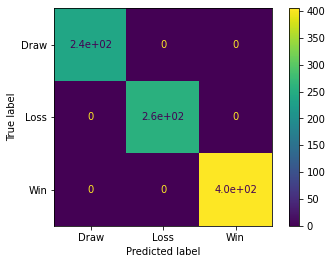

In [159]:
# Creating the confusion matrix
plot_confusion_matrix(grid_model,scaled_W_test,z_test)

In [161]:
# Classication report
print(classification_report(z_test,z_pred))

              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00       240
        Loss       1.00      1.00      1.00       257
         Win       1.00      1.00      1.00       405

    accuracy                           1.00       902
   macro avg       1.00      1.00      1.00       902
weighted avg       1.00      1.00      1.00       902



Logistic Regression could predict with 100% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.


## Challenging the Solution

Attempt to make the predictions of away score using other models to find out a lower root mean squared error.
